# Logistic Regression on Non-Linear Circular Data

This notebook demonstrates the **limitations of basic logistic regression** when applied to **non-linearly separable data**.

We simulate a simple circular dataset with two classes:
- Points inside a circle (Class 0)
- Points outside the circle (Class 1)

Then we:
- Attempt to fit a basic logistic regression model
- Show that a linear model fails to capture the circular pattern
- Explore how adding polynomial features (like $x^2 + y^2$) can help

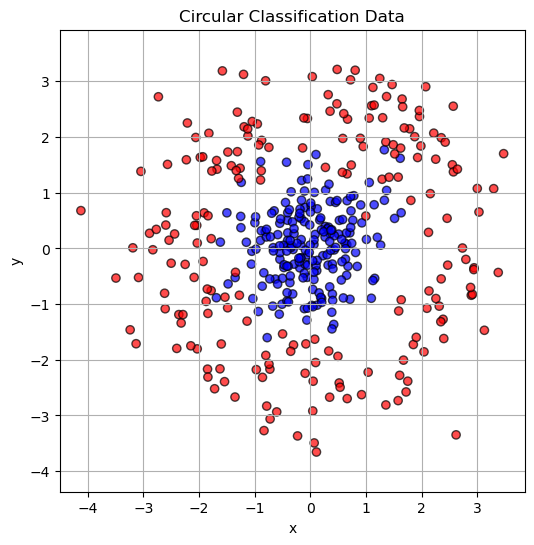

In [1]:
#Generating data
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

#inner samples (class 0)
n_samples = 200
r_inner = np.random.uniform(0.0, 1.0, n_samples)
theta_inner = np.random.uniform(0, 2 * np.pi, n_samples)
x_inner = r_inner * np.cos(theta_inner)
y_inner = r_inner * np.sin(theta_inner)
labels_inner = np.zeros(n_samples)

# outer samples (class 1)
r_outer = np.random.uniform(2.0, 3.0, n_samples)
theta_outer = np.random.uniform(0, 2 * np.pi, n_samples)
x_outer = r_outer * np.cos(theta_outer)
y_outer = r_outer * np.sin(theta_outer)
labels_outer = np.ones(n_samples)

# adding noise 
noise_level = 0.5  # try values between 0.1 and 0.5
x_inner += np.random.normal(0, noise_level, n_samples)
y_inner += np.random.normal(0, noise_level, n_samples)
x_outer += np.random.normal(0, noise_level, n_samples)
y_outer += np.random.normal(0, noise_level, n_samples)

# Combining the samples
X = np.vstack([
    np.column_stack([x_inner, y_inner]),
    np.column_stack([x_outer, y_outer])
])
y = np.concatenate([labels_inner, labels_outer])

# Plotting 
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', alpha=0.7)
plt.title("Circular Classification Data")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.grid(True)
plt.show()

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

w = np.array([1.0, 1.0])          # intial weights: [w1, w2]
b = 1.0                           # initial bias

def predict(X, w, b):
    z = np.dot(X, w) + b
    return sigmoid(z)   

def compute_loss(y, y_pred):
    epsilon = 1e-8
    return -np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))

def compute_gradients(X, y, y_pred):
    n = X.shape[0]
    error = y_pred - y
    dw = np.dot(X.T, error) / n
    db = np.sum(error) / n
    return dw, db

In [3]:
learning_rate = 0.1
epochs = 3000
losses = []

for epoch in range(epochs):
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    
    loss = compute_loss(y, y_pred)
    losses.append(loss)

    #update weights and bias 
    dw, db = compute_gradients(X, y, y_pred)
    w -= learning_rate * dw
    b -= learning_rate * db

    # Optionally print every 300 steps
    if epoch % 300 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 1.1365
Epoch 300, Loss: 0.6920
Epoch 600, Loss: 0.6920
Epoch 900, Loss: 0.6920
Epoch 1200, Loss: 0.6920
Epoch 1500, Loss: 0.6920
Epoch 1800, Loss: 0.6920
Epoch 2100, Loss: 0.6920
Epoch 2400, Loss: 0.6920
Epoch 2700, Loss: 0.6920


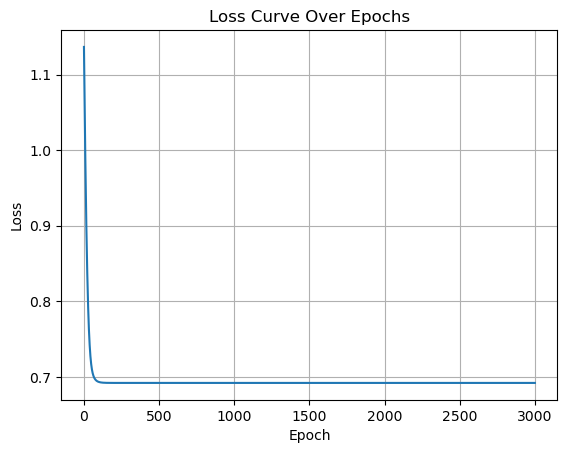

In [4]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve Over Epochs")
plt.grid(True)
plt.show()

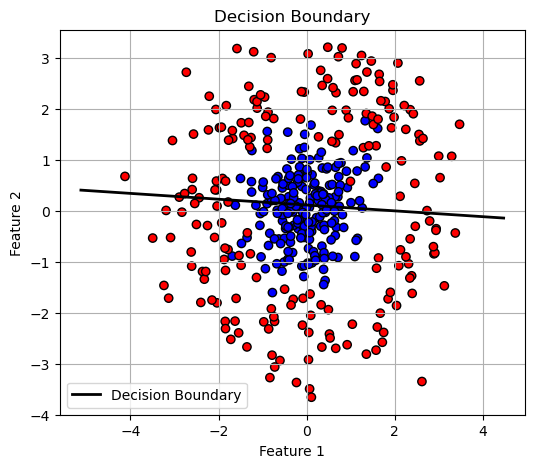

In [5]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary")

x1_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
x2_vals = -(w[0] * x1_vals + b) / w[1]  # derived from model

plt.plot(x1_vals, x2_vals, color='black', linewidth=2, label="Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
pred_probs = sigmoid(np.dot(X, w) + b)
pred_labels = (pred_probs >= 0.5).astype(int)
accuracy = np.mean(pred_labels == y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.52


---
### Why Linear Logistic Regression Fails on Circular Data

Linear logistic regression tries to find a **straight-line decision boundary** using a linear combination of input features:

$$
z = w_1 x_1 + w_2 x_2 + b
$$

This works well when the classes are **linearly separable** — that is, when a straight line (or hyperplane) can cleanly divide the two classes.

However, in our circular dataset.Our samples are **not separable by a straight line**.

As a result:

- The model tries to find a linear boundary, which cuts through both classes.
- It **misclassifies** a large number of points.
- Training still reduces the loss, but the **final accuracy is low (~59%)**.
- The learned boundary appears as a straight line in the plot, not a circular one.

---

To fix this, we can transform the data using **nonlinear features**, such as:

$$
x'_1 = x_1^2,\quad x'_2 = x_2^2
$$

This enables the model to learn a decision boundary in the form:

$$
z = w_1 x_1^2 + w_2 x_2^2 + b
$$

Which can represent **circular shapes** and correctly classify the inner vs outer regions.



In [7]:
# Feature tranformation

X_transformed = X ** 2  # Square each feature (non-linear transform)

w2 = np.array([1.0, 1.0])
b2 = 1.0
losses2 = []

for epoch in range(3000):
    z = np.dot(X_transformed, w2) + b2
    y_pred = sigmoid(z)
    
    loss = compute_loss(y, y_pred)
    losses2.append(loss)

    dw, db = compute_gradients(X_transformed, y, y_pred)
    w2 -= learning_rate * dw
    b2 -= learning_rate * db

    if epoch % 300 == 0:
        print(f"[Transformed] Epoch {epoch}, Loss: {loss:.4f}")

[Transformed] Epoch 0, Loss: 1.0245
[Transformed] Epoch 300, Loss: 0.1741
[Transformed] Epoch 600, Loss: 0.1409
[Transformed] Epoch 900, Loss: 0.1300
[Transformed] Epoch 1200, Loss: 0.1249
[Transformed] Epoch 1500, Loss: 0.1221
[Transformed] Epoch 1800, Loss: 0.1203
[Transformed] Epoch 2100, Loss: 0.1192
[Transformed] Epoch 2400, Loss: 0.1184
[Transformed] Epoch 2700, Loss: 0.1179


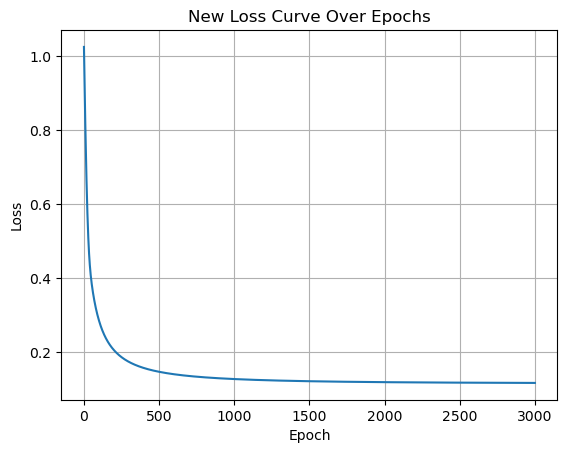

In [8]:
plt.plot(losses2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("New Loss Curve Over Epochs")
plt.grid(True)
plt.show()

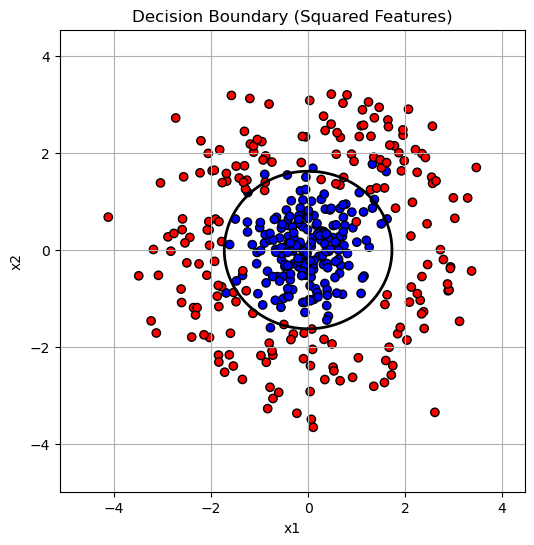

In [9]:
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300)
)

grid = np.c_[xx.ravel()**2, yy.ravel()**2]
probs = sigmoid(np.dot(grid, w2) + b2).reshape(xx.shape)

plt.figure(figsize=(6, 6))
plt.contour(xx, yy, probs, levels=[0.5], colors='black', linewidths=2) 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Decision Boundary (Squared Features)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.grid(True)
plt.show()

In [10]:
pred_probs2 = sigmoid(np.dot(X_transformed, w2) + b2)
pred_labels2 = (pred_probs2 >= 0.5).astype(int)
accuracy2 = np.mean(pred_labels2 == y)
print(f"[Transformed] Accuracy: {accuracy2:.2f}")

[Transformed] Accuracy: 0.95


### What Changed 

The original logistic regression failed to classify circular data because it only learns linear boundaries.

By squaring the features (i.e., using ($ x_1^2, x_2^2 $) instead of $( x_1, x_2 ))$, we allowed the model to capture **circular patterns** — similar to a quadratic equation.

This small change made logistic regression capable of correctly classifying ring-shaped data without changing the underlying algorithm.

---

## Now using sklearn

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train scikit-learn logistic regression
model = LogisticRegression()
model.fit(X, y)

sklearn_preds = model.predict(X)
sklearn_acc = accuracy_score(y, sklearn_preds)

print(f"Sklearn Accuracy: {sklearn_acc:.2f}")

Sklearn Accuracy: 0.52


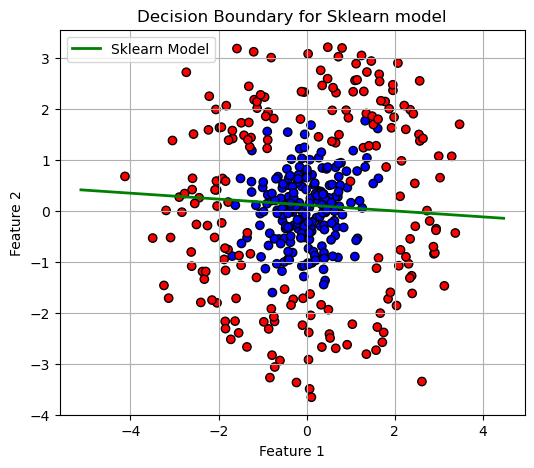

In [12]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary for Sklearn model")

w1_skl = model.coef_[0][0]
w2_skl = model.coef_[0][1]
b_skl = model.intercept_[0]
x2_skvals = -(w1_skl * x1_vals + b_skl) / w2_skl
plt.plot(x1_vals, x2_skvals, color='green', linewidth=2, label="Sklearn Model")

plt.legend()
plt.grid(True)
plt.show()

---
### Why sklearn's model failed too

By default, `LogisticRegression` in scikit-learn is a **linear model**. It tries to separate data using a straight line (or hyperplane), which doesn't work well for circular patterns.

To model circular or non-linear boundaries, we need to use **non-linear feature transformations**, such as squaring the inputs or using `PolynomialFeatures`.

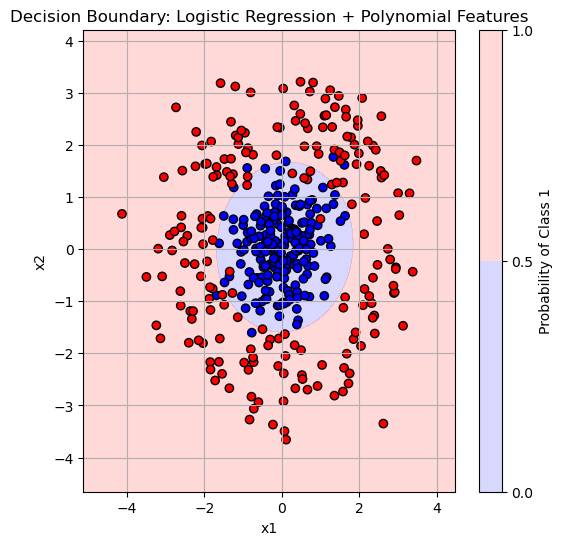

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Create a pipeline: Polynomial transformation + Logistic Regression
poly_clf = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LogisticRegression()
)

# Fit the model
poly_clf.fit(X, y)

# Create a meshgrid for plotting decision boundary
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]
probs = poly_clf.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plotting the decision boundary
plt.figure(figsize=(6, 6))
contour = plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3, cmap='bwr')
plt.colorbar(contour, label='Probability of Class 1')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Decision Boundary: Logistic Regression + Polynomial Features")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()